<a href="https://colab.research.google.com/github/soujanya-vattikolla/Tensorflow/blob/main/ReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reinforcement Learning




###Terminology

**Enviornemt** In reinforcement learning tasks we have a notion of the enviornment. This is what our *agent* will explore. An example of an enviornment in the case of training an AI to play say a game of mario would be the level we are training the agent on.

**Agent** an agent is an entity that is exploring the enviornment. Our agent will interact and take different actions within the enviornment. In our mario example the mario character within the game would be our agent. 

**State** always our agent will be in what we call a *state*. The state simply tells us about the status of the agent. The most common example of a state is the location of the agent within the enviornment. Moving locations would change the agents state.

**Action** any interaction between the agent and enviornment would be considered an action. For example, moving to the left or jumping would be an action. 

**Reward** every action that our agent takes will result in a reward of some magnitude (positive or negative). The goal of our agent will be to maximize its reward in an enviornment. 

The most important part of reinforcement learning is determing how to reward the agent. After all, the goal of the agent is to maximize its rewards. This means we should reward the agent appropiatly such that it reaches the desired goal.



###Q-Learning

* Q-Learning is a simple yet quite powerful technique in machine learning that involves learning a matrix of action-reward values. 
* This matrix is often reffered to as a Q-Table or Q-Matrix. The matrix is in shape (number of possible states, number of possible actions) where each value at matrix[n, m] represents the agents expected reward given they are in state n and take action m. 
* The Q-learning algorithm defines the way we update the values in the matrix and decide what action to take at each state. 
* The idea is that after a succesful training/learning of this Q-Table/matrix we can determine the action an agent should take in any state by looking at that states row in the matrix and taking the maximium value column as the action.

**Consider this example.**

Let's say A1-A4 are the possible actions and we have 3 states represented by each row (state 1 - state 3).

| A1  | A2  | A3  | A4  |
|:--: |:--: |:--: |:--: |
|  0  |  0  | 10  |  5  |
|  5  | 10  |  0  |  0  |
| 10  |  5  |  0  |  0  |

If that was our Q-Table/matrix then the following would be the preffered actions in each state.

> State 1: A3

> State 2: A2

> State 3: A1

We can see that this is because the values in each of those columns are the highest for those states!



###Learning the Q-Table

Our agent learns by exploring the enviornment and observing the outcome/reward from each action it takes in each state. But how does it know what action to take in each state? There are two ways that our agent can decide on which action to take.
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action.

####Updating Q-Values
The formula for updating the Q-Table after each action is as follows:
> $ Q[state, action] = Q[state, action] + \alpha * (reward + \gamma * max(Q[newState, :]) - Q[state, action]) $

- $\alpha$ stands for the **Learning Rate**

- $\gamma$ stands for the **Discount Factor**

####Learning Rate $\alpha$
The learning rate $\alpha$ is a numeric constant that defines how much change is permitted on each QTable update. A high learning rate means that each update will introduce a large change to the current state-action value. A small learning rate means that each update has a more subtle change. 

####Discount Factor $\gamma$
Discount factor also know as gamma ($\gamma$) is used to balance how much focus is put on the current and future reward. A high discount factor means that future rewards will be considered more heavily.





###Q-Learning Example

For this example we will use the Q-Learning algorithm to train an agent to navigate a popular enviornment from the [Open AI Gym]

In [ ]:
import gym   # all you have to do to import and use open ai gym!

Once you import gym you can load an enviornment using the line ```gym.make("enviornment")```.

In [ ]:
env = gym.make('FrozenLake-v0')  # we are going to use the FrozenLake enviornment

There are a few other commands that can be used to interact and get information about the enviornment.

In [ ]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [ ]:
env.reset()  # reset enviornment to default state

0

In [ ]:
action = env.action_space.sample()  # get a random action 

In [ ]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

In [ ]:
env.render()   # render the GUI for the enviornment 

  (Right)
SFFF
FHFH
FFFH
HFFG


###Frozen Lake Enviornment

The enviornment we loaded above ```FrozenLake-v0``` is one of the simplest enviornments in Open AI Gym. The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice (render the enviornment above to see an example).

There are:
- 16 states (one for each square) 
- 4 possible actions (LEFT, RIGHT, DOWN, UP)
- 4 different types of blocks (F: frozen, H: hole, S: start, G: goal)



###Building the Q-Table
The first thing we need to do is build an empty Q-Table that we can use to store and update our values.

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [ ]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

###Constants
As we discussed we need to define some constants that will be used to update our Q-Table and tell our agent when to stop training.

In [ ]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

###Picking an Action
Remember that we can pick an action using one of two methods:
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action.

Here we will define a new value $\epsilon$ that will tell us the probabillity of selecting a random action. This value will start off very high and slowly decrease as the agent learns more about the enviornment.

In [ ]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

###Updating Q Values
The code below implements the formula discussed above.

In [ ]:
# Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

###Putting it Together
Now that we know how to do some basic things we can combine these together to create our Q-Learning algorithm,

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [ ]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[3.11002539e-01 1.82254444e-02 1.82552622e-02 1.85106146e-02]
 [8.55338155e-03 1.37874347e-03 8.96923586e-03 2.62475703e-01]
 [1.95455278e-01 8.24638912e-03 7.05146687e-03 1.28942635e-02]
 [3.01146044e-03 6.92193859e-03 2.88744735e-03 1.32958601e-02]
 [2.56929824e-01 4.76415462e-03 1.77870311e-03 9.34759078e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.40356610e-05 5.81228239e-05 1.79726311e-02 1.01774996e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.58932597e-03 3.98316417e-03 1.09719551e-02 2.85277929e-01]
 [4.58412013e-03 5.00886739e-01 6.21504812e-03 3.41139217e-03]
 [9.60586502e-02 2.60525324e-03 5.26165176e-03 3.75290657e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.07216603e-01 3.40565022e-02 5.53779603e-01 7.77830572e-02]
 [2.29778104e-01 7.32650202e-01 2.15908243e-01 1.85535897e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

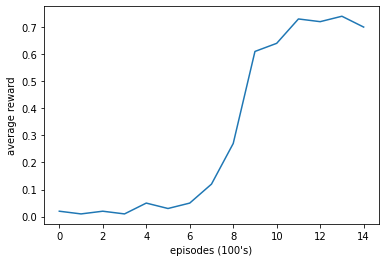

In [ ]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()